In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer
from sklearn.preprocessing import MaxAbsScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import *
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [3]:
df = pd.read_csv('freq_exposition_achat_merged2.csv')

## Analysis

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35388 entries, 0 to 35387
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35388 non-null  int64  
 1   customer_id        35388 non-null  object 
 2   sales              35388 non-null  float64
 3   quantity           35388 non-null  float64
 4   Add to cart        35388 non-null  float64
 5   Order              35388 non-null  float64
 6   Product Page View  35388 non-null  float64
 7   freq_react         35388 non-null  float64
 8   device_id          35388 non-null  object 
 9   freq_tv            35388 non-null  int64  
 10  dsp_id             35388 non-null  object 
 11  freq_prog          35388 non-null  int64  
 12  freq_totale        35388 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 3.5+ MB
None


In [5]:
display(df.head(10))

,Unnamed: 0,customer_id,sales,quantity,Add to cart,Order,Product Page View,freq_react,device_id,freq_tv,dsp_id,freq_prog,freq_totale
0,0,re00CKn2yOaub2t96K,46.67,1.0,1.0,1.0,6.0,8.0,ctvOeSltoMMJ,2,dspjS8smJIRHKBhwamdxBzZzZh1CJi,1,3
1,1,re00aRkgItYQpIBs4v,78.98,1.0,2.0,1.0,3.0,6.0,ctv4YVSu6w48,1,dspDxWVaZM9Z4zFgpWlqyCe9YFZ6xk,1,2
2,2,re00fY6oH5hwDeHicN,172.97,3.0,4.0,3.0,16.0,23.0,ctvWuzHNZ43W,1,dspcvhk8ZfZ6nrN3eQMm2Q6pbbM2Gh,1,2
3,3,re00itkOXBMIgSS7yM,20.49,1.0,1.0,1.0,2.0,4.0,ctvz0yKxiDe6,1,dspcBhtHgoJg7gJTDZXbz8C8K2ysrS,2,3
4,4,re00qEtvplbarZyd4l,0.00,0.0,0.0,0.0,1.0,1.0,ctvVVbtu2MuP,4,dspLjyKPkZ7Ugubsr2p30xoXDaQIv8,1,5
5,5,re010o5W6JWsQq2Nke,0.00,0.0,2.0,0.0,12.0,14.0,ctv8U69yieBw,4,dsp2hRg7K8ya8rnwDnXjQ3tJkf8INo,1,5
6,6,re012Muoq9mKQlWPfh,175.97,2.0,2.0,2.0,9.0,13.0,ctvM7UVrUMbm,1,dspNAGOKX0IiVJsUSpBSmytdOoCVPV,1,2
7,7,re013Kr8KhunDrCoAe,418.32,9.0,5.0,9.0,4.0,18.0,ctvvrCfzbf3q,10,dspToKbpzMZQbwp5mEmDXqDl3Gs8Dd,2,12
8,8,re015otsriXJHU4ruM,72.98,2.0,2.0,2.0,0.0,4.0,ctv06s7A69aP,2,dspTssEGLDh1n9UtIUej1acLydfk1o,3,5
9,9,re01LvhApXxFB5SJQK,0.00,0.0,0.0,0.0,2.0,2.0,ctvdNmSSF45S,1,dspEN88px300feFUyQYtaKIB6sJ0ES,3,4


In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)

## Data Cleaning

In [7]:
print(df.dtypes)

customer_id           object
sales                float64
quantity             float64
Add to cart          float64
Order                float64
Product Page View    float64
freq_react           float64
device_id             object
freq_tv                int64
dsp_id                object
freq_prog              int64
freq_totale            int64
dtype: object


In [8]:
df['freq_tv'].describe()

count    35388.000000
mean         3.401294
std          5.591288
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        162.000000
Name: freq_tv, dtype: float64

In [9]:
df['freq_prog'].describe()

count    35388.000000
mean         4.528004
std          7.100519
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        135.000000
Name: freq_prog, dtype: float64

In [10]:
df['freq_totale'].describe()

count    35388.000000
mean         7.929298
std          9.016122
min          2.000000
25%          3.000000
50%          5.000000
75%          9.000000
max        163.000000
Name: freq_totale, dtype: float64

## Plotting Cap Curve

#### Capping Value analysis of "freq_totale"

In [11]:
# Define the bins and corresponding labels
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

# Create the binned column
df['freq_bins'] = pd.cut(df['freq_totale'], bins=bins, labels=labels, right=False)

# Verify the bins
print(df[['freq_totale', 'freq_bins']].head())

   freq_totale freq_bins
0            3       0-5
1            2       0-5
2            2       0-5
3            3       0-5
4            5      5-10


  Frequency Bin  Average Reactions
0           0-5           7.776796
1          5-10           7.517707
2         10-15           7.775804
3         15-20           8.131683
4         20-30           8.128134
5         30-40           8.666151
6         40-50           5.658537
7        50-100           7.805785
8       100-200           3.909091


C:\Users\lenna\AppData\Local\Temp\ipykernel_29880\2374596131.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reactions_per_bin = df.groupby('freq_bins')['freq_react'].mean()


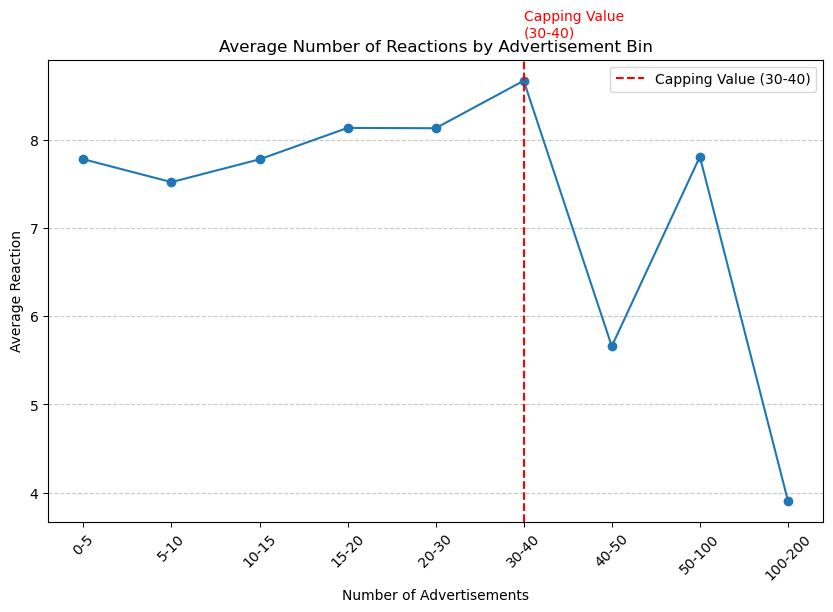

In [12]:
# Group by bins and calculate the mean reactions
avg_reactions_per_bin = df.groupby('freq_bins')['freq_react'].mean()
avg_reactions_per_bin_df = avg_reactions_per_bin.reset_index()
avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

# Print the data for reference
print(avg_reactions_per_bin_df)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
max_reaction_index = avg_reactions_per_bin_df['Average Reactions'].idxmax()
capping_bin = avg_reactions_per_bin_df.iloc[max_reaction_index]['Frequency Bin']
capping_reaction = avg_reactions_per_bin_df.iloc[max_reaction_index]['Average Reactions']

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_reactions_per_bin_df['Frequency Bin'], avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Number of Reactions by Advertisement Bin")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=capping_bin, color='red', linestyle='--', label=f"Capping Value ({capping_bin})")
plt.annotate(f'Capping Value\n({capping_bin})', 
             xy=(capping_bin, capping_reaction), 
             xytext=(capping_bin, capping_reaction + 0.5),
             # arrowprops=dict(facecolor='red', arrowstyle='->'),
             color='red')

plt.legend()
plt.show()

#### Capping Value analysis of "freq_tv"

In [14]:
# Define the bins and corresponding labels
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

# Create the binned column
df['freq_tv_bins'] = pd.cut(df['freq_tv'], bins=bins, labels=labels, right=False)

# Verify the bins
print(df[['freq_tv', 'freq_tv_bins']].head())

   freq_tv freq_tv_bins
0        2          0-5
1        1          0-5
2        1          0-5
3        1          0-5
4        4          0-5


  TV Frequency Bin  Average Reactions
0              0-5           7.870197
1             5-10           7.134318
2            10-15           7.287440
3            15-20           7.224490
4            20-30           7.197279
5            30-40           7.152000
6            40-50           9.516129
7           50-100           8.466667
8          100-200           4.200000


C:\Users\lenna\AppData\Local\Temp\ipykernel_29880\2220678683.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reactions_per_bin = df.groupby('freq_tv_bins')['freq_react'].mean()


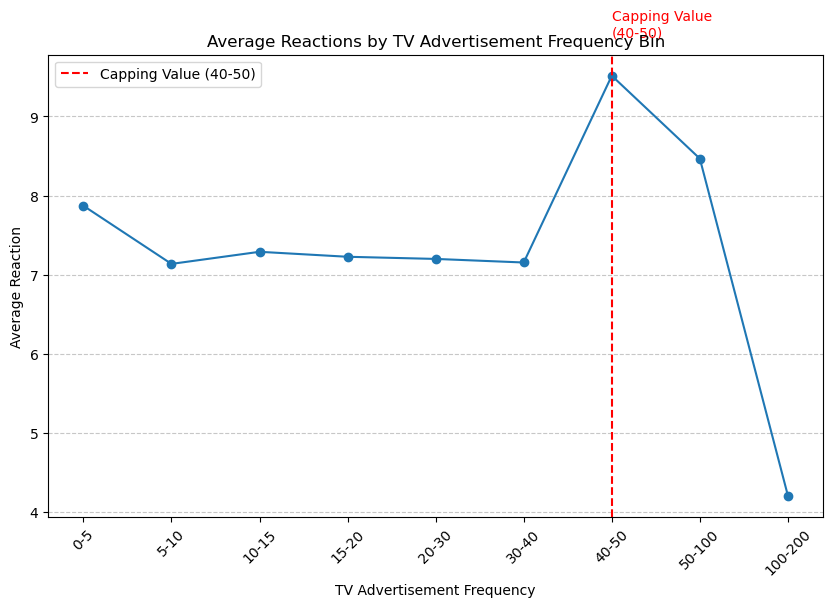

In [15]:
# Group by bins and calculate the mean reactions
avg_reactions_per_bin = df.groupby('freq_tv_bins')['freq_react'].mean()
avg_reactions_per_bin_df = avg_reactions_per_bin.reset_index()
avg_reactions_per_bin_df.columns = ['TV Frequency Bin', 'Average Reactions']

# Print the data for reference
print(avg_reactions_per_bin_df)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
max_reaction_index = avg_reactions_per_bin_df['Average Reactions'].idxmax()
capping_bin = avg_reactions_per_bin_df.iloc[max_reaction_index]['TV Frequency Bin']
capping_reaction = avg_reactions_per_bin_df.iloc[max_reaction_index]['Average Reactions']

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_reactions_per_bin_df['TV Frequency Bin'], avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Reactions by TV Advertisement Frequency Bin")
plt.xlabel("TV Advertisement Frequency")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=capping_bin, color='red', linestyle='--', label=f"Capping Value ({capping_bin})")
plt.annotate(f'Capping Value\n({capping_bin})', 
             xy=(capping_bin, capping_reaction), 
             xytext=(capping_bin, capping_reaction + 0.5),
             # arrowprops=dict(facecolor='red', arrowstyle='->'),
             color='red')

plt.legend()
plt.show()

##### Conclusion: The capping value of tv advertising is in bin 40 - 50 over all customer segments.

#### Capping Value analysis of "freq_prog"

In [17]:
# Define the bins and corresponding labels
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

# Create the binned column
df['freq_prog_bins'] = pd.cut(df['freq_prog'], bins=bins, labels=labels, right=False)

# Verify the bins
print(df[['freq_prog', 'freq_prog_bins']].head())

   freq_prog freq_prog_bins
0          1            0-5
1          1            0-5
2          1            0-5
3          2            0-5
4          1            0-5


  Programmatic Frequency Bin  Average Reactions
0                        0-5           7.586419
1                       5-10           7.993438
2                      10-15           8.369817
3                      15-20           9.208413
4                      20-30           8.129568
5                      30-40           8.294479
6                      40-50           6.155039
7                     50-100           6.669811
8                    100-200           4.200000


C:\Users\lenna\AppData\Local\Temp\ipykernel_29880\393574258.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reactions_per_bin = df.groupby('freq_prog_bins')['freq_react'].mean()


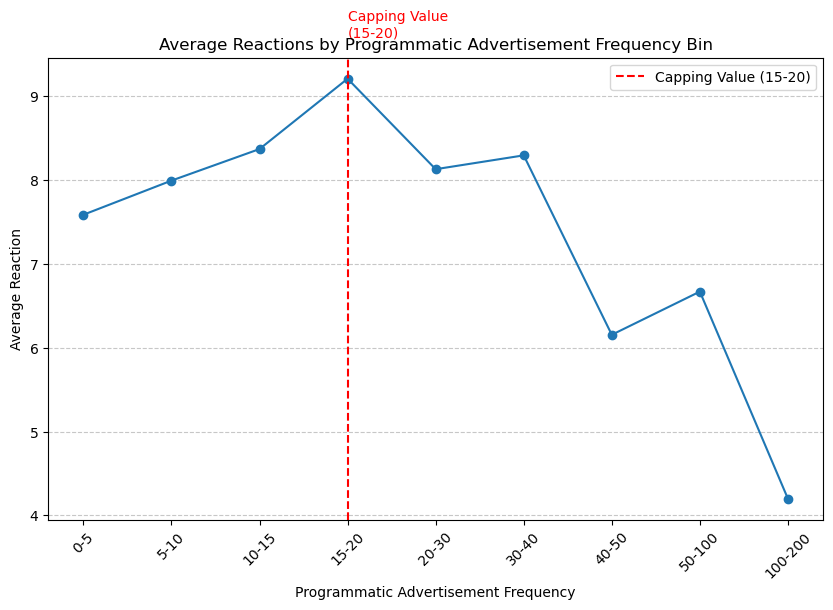

In [18]:
# Group by bins and calculate the mean reactions
avg_reactions_per_bin = df.groupby('freq_prog_bins')['freq_react'].mean()
avg_reactions_per_bin_df = avg_reactions_per_bin.reset_index()
avg_reactions_per_bin_df.columns = ['Programmatic Frequency Bin', 'Average Reactions']

# Print the data for reference
print(avg_reactions_per_bin_df)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
max_reaction_index = avg_reactions_per_bin_df['Average Reactions'].idxmax()
capping_bin = avg_reactions_per_bin_df.iloc[max_reaction_index]['Programmatic Frequency Bin']
capping_reaction = avg_reactions_per_bin_df.iloc[max_reaction_index]['Average Reactions']

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_reactions_per_bin_df['Programmatic Frequency Bin'], avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.title("Average Reactions by Programmatic Advertisement Frequency Bin")
plt.xlabel("Programmatic Advertisement Frequency")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=capping_bin, color='red', linestyle='--', label=f"Capping Value ({capping_bin})")
plt.annotate(f'Capping Value\n({capping_bin})', 
             xy=(capping_bin, capping_reaction), 
             xytext=(capping_bin, capping_reaction + 0.5),
             # arrowprops=dict(facecolor='red', arrowstyle='->'),
             color='red')

plt.legend()
plt.show()

##### Conclusion: The capping value of programmatic advertising is in bin 15 - 20 over all customer segments.

## Plotting Weighted Cap Curve

In [20]:
# Define weights
weight_page_view = 1
weight_add_to_cart = 2
weight_order = 3

# Normalize each attribute to the range [0, 1]
df['Product Page View Norm'] = df['Product Page View'] / df['Product Page View'].max()
df['Add to cart Norm'] = df['Add to cart'] / df['Add to cart'].max()
df['Order Norm'] = df['Order'] / df['Order'].max()

# Calculate the weighted reaction using normalized values
df['weighted_reaction'] = (
    df['Product Page View Norm'] * weight_page_view +
    df['Add to cart Norm'] * weight_add_to_cart +
    df['Order Norm'] * weight_order
)

#### Weighted Capping Value analysis of "freq_totale"

In [21]:
# Reuse existing bins for advertisement frequency
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

# Bin the freq_total column
df['freq_bins'] = pd.cut(df['freq_totale'], bins=bins, labels=labels, right=False)

# Verify the bins
print(df[['freq_totale', 'freq_bins']].head())

   freq_totale freq_bins
0            3       0-5
1            2       0-5
2            2       0-5
3            3       0-5
4            5      5-10


  Frequency Bin  Average Weighted Reaction
0           0-5                   0.151734
1          5-10                   0.140742
2         10-15                   0.150095
3         15-20                   0.155928
4         20-30                   0.153357
5         30-40                   0.165604
6         40-50                   0.092717
7        50-100                   0.101919
8       100-200                   0.034120
Capping Value and Weighted Reaction:
Capping Bin: 30-40, Weighted Reaction: 0.16560423666769156


C:\Users\lenna\AppData\Local\Temp\ipykernel_29880\3717800920.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_weighted_reaction = df.groupby('freq_bins')['weighted_reaction'].mean()


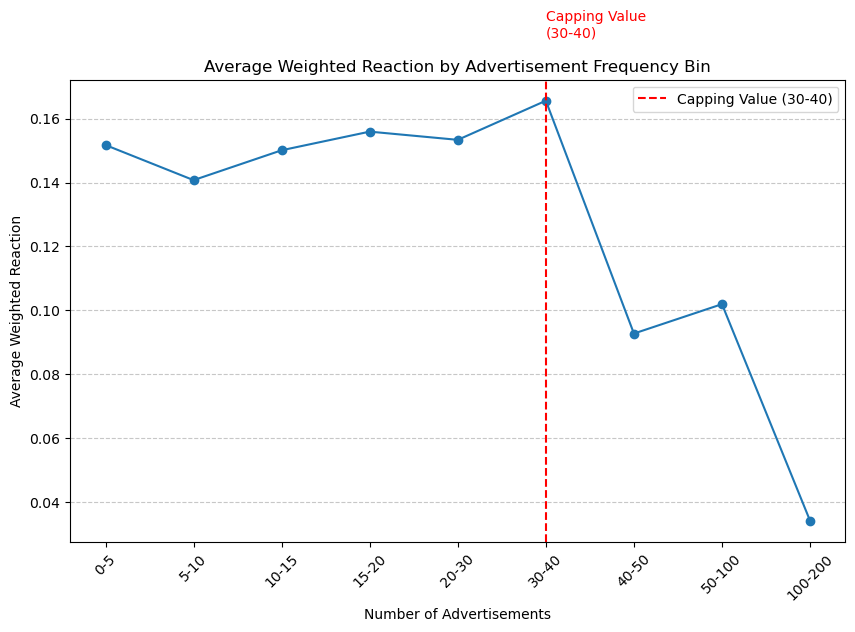

In [22]:
# Group by bins and calculate the average normalized weighted reaction
avg_weighted_reaction = df.groupby('freq_bins')['weighted_reaction'].mean()
avg_weighted_reaction_df = avg_weighted_reaction.reset_index()
avg_weighted_reaction_df.columns = ['Frequency Bin', 'Average Weighted Reaction']

# Print the data for reference
print(avg_weighted_reaction_df)

# Identify the capping value (beginning of plateau or max reaction)
# Find the index of the highest average reaction
capping_index = avg_weighted_reaction_df['Average Weighted Reaction'].idxmax()
capping_bin = avg_weighted_reaction_df.iloc[capping_index]['Frequency Bin']
capping_reaction = avg_weighted_reaction_df.iloc[capping_index]['Average Weighted Reaction']

print("Capping Value and Weighted Reaction:")
print(f"Capping Bin: {capping_bin}, Weighted Reaction: {capping_reaction}")

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_weighted_reaction_df['Frequency Bin'], avg_weighted_reaction_df['Average Weighted Reaction'], marker='o', linestyle='-')
plt.title("Average Weighted Reaction by Advertisement Frequency Bin")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Weighted Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line for the capping value
plt.axvline(x=capping_bin, color='red', linestyle='--', label=f"Capping Value ({capping_bin})")
plt.annotate(f'Capping Value\n({capping_bin})', 
             xy=(capping_bin, capping_reaction), 
             xytext=(capping_bin, capping_reaction + 0.02),
             # arrowprops=dict(facecolor='red', arrowstyle='->'),
             color='red')

plt.legend()
plt.show()

##### Conclusion: The total capping value of advertising for weighted reaction is 30 - 40 over all customer segments.

#### Weighted Capping Value analysis of "freq_tv"

In [176]:
# Define the bins and corresponding labels
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

# Create the binned column
df['freq_tv_bins'] = pd.cut(df['freq_tv'], bins=bins, labels=labels, right=False)

# Verify the bins
print(df[['freq_tv', 'freq_tv_bins']].head())

   freq_tv freq_tv_bins
0        2          0-5
1        1          0-5
2        1          0-5
3        1          0-5
4        4          0-5


  TV Frequency Bin  Average Weighted Reactions
0              0-5                    0.150297
1             5-10                    0.140159
2            10-15                    0.141546
3            15-20                    0.128120
4            20-30                    0.146991
5            30-40                    0.138437
6            40-50                    0.173050
7           50-100                    0.127494
8          100-200                    0.043255
Capping Bin: 40-50, Capping Weighted Reaction: 0.1730503358816213


C:\Users\lenna\AppData\Local\Temp\ipykernel_29880\2695307183.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_weighted_reactions_per_bin = df.groupby('freq_tv_bins')['weighted_reaction'].mean()


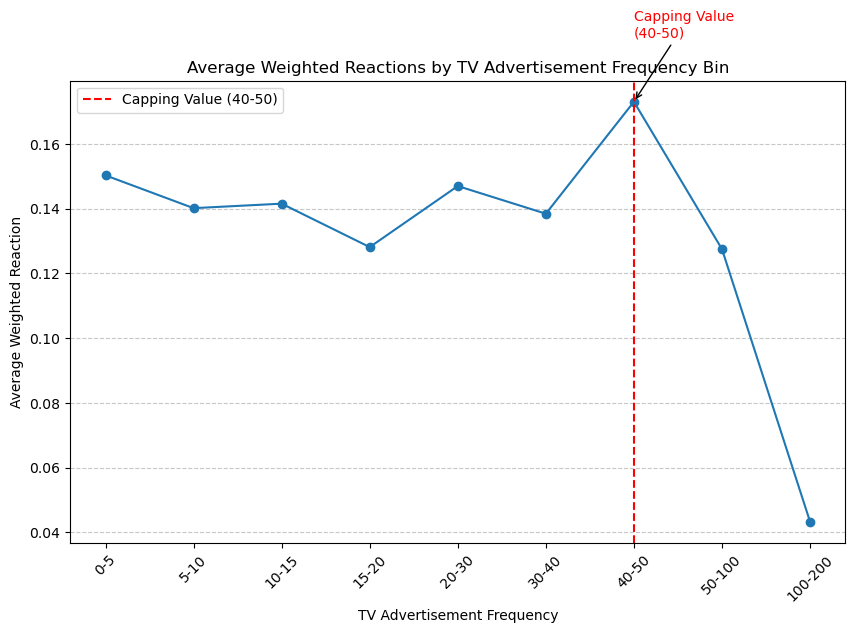

In [24]:
# Group by bins for TV advertisement frequency and calculate the mean weighted reactions
avg_weighted_reactions_per_bin = df.groupby('freq_tv_bins')['weighted_reaction'].mean()
avg_weighted_reactions_per_bin_df = avg_weighted_reactions_per_bin.reset_index()
avg_weighted_reactions_per_bin_df.columns = ['TV Frequency Bin', 'Average Weighted Reactions']

# Print the data for reference
print(avg_weighted_reactions_per_bin_df)

# Identify the capping value (highest average weighted reaction)
max_reaction_index = avg_weighted_reactions_per_bin_df['Average Weighted Reactions'].idxmax()
capping_bin = avg_weighted_reactions_per_bin_df.iloc[max_reaction_index]['TV Frequency Bin']
capping_reaction = avg_weighted_reactions_per_bin_df.iloc[max_reaction_index]['Average Weighted Reactions']

print(f"Capping Bin: {capping_bin}, Capping Weighted Reaction: {capping_reaction}")

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_weighted_reactions_per_bin_df['TV Frequency Bin'], avg_weighted_reactions_per_bin_df['Average Weighted Reactions'], marker='o', linestyle='-')
plt.title("Average Weighted Reactions by TV Advertisement Frequency Bin")
plt.xlabel("TV Advertisement Frequency")
plt.ylabel("Average Weighted Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=capping_bin, color='red', linestyle='--', label=f"Capping Value ({capping_bin})")
plt.annotate(f'Capping Value\n({capping_bin})', 
             xy=(capping_bin, capping_reaction), 
             xytext=(capping_bin, capping_reaction + 0.02),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             color='red')

plt.legend()
plt.show()


##### Conclusion: The capping value of tv advertising for weighted reaction is 40 - 50 over all customer segments.

#### Weighted Capping Value analysis of "freq_prog"

In [179]:
# Define the bins and corresponding labels
bins = [0, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["0-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

# Create the binned column
df['freq_prog_bins'] = pd.cut(df['freq_prog'], bins=bins, labels=labels, right=False)

# Verify the bins
print(df[['freq_prog', 'freq_prog_bins']].head())

   freq_prog freq_prog_bins
0          1            0-5
1          1            0-5
2          1            0-5
3          2            0-5
4          1            0-5


  Programmatic Frequency Bin  Average Weighted Reactions
0                        0-5                    0.147161
1                       5-10                    0.147649
2                      10-15                    0.160823
3                      15-20                    0.169180
4                      20-30                    0.153137
5                      30-40                    0.143502
6                      40-50                    0.095166
7                     50-100                    0.068856
8                    100-200                    0.031224
Capping Bin: 15-20, Capping Weighted Reaction: 0.16917995802937033


C:\Users\lenna\AppData\Local\Temp\ipykernel_29880\773175800.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_weighted_reactions_prog_bins = df.groupby('freq_prog_bins')['weighted_reaction'].mean()


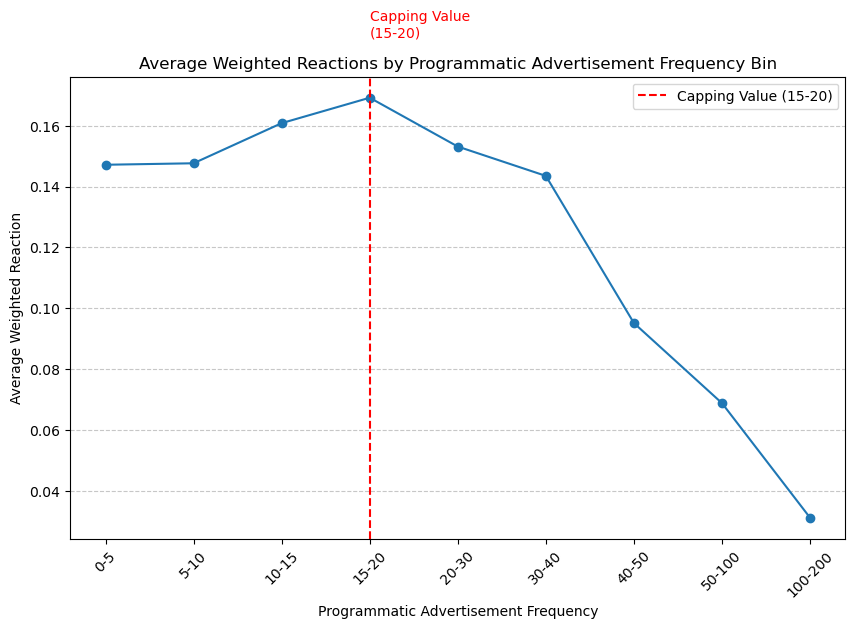

In [26]:
# Group by bins for programmatic frequency and calculate the mean weighted reactions
avg_weighted_reactions_prog_bins = df.groupby('freq_prog_bins')['weighted_reaction'].mean()
avg_weighted_reactions_prog_bins_df = avg_weighted_reactions_prog_bins.reset_index()
avg_weighted_reactions_prog_bins_df.columns = ['Programmatic Frequency Bin', 'Average Weighted Reactions']

# Print the data for reference
print(avg_weighted_reactions_prog_bins_df)

# Identify the capping value (highest average weighted reaction)
max_reaction_index = avg_weighted_reactions_prog_bins_df['Average Weighted Reactions'].idxmax()
capping_bin = avg_weighted_reactions_prog_bins_df.iloc[max_reaction_index]['Programmatic Frequency Bin']
capping_reaction = avg_weighted_reactions_prog_bins_df.iloc[max_reaction_index]['Average Weighted Reactions']

print(f"Capping Bin: {capping_bin}, Capping Weighted Reaction: {capping_reaction}")

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_weighted_reactions_prog_bins_df['Programmatic Frequency Bin'], avg_weighted_reactions_prog_bins_df['Average Weighted Reactions'], marker='o', linestyle='-')
plt.title("Average Weighted Reactions by Programmatic Advertisement Frequency Bin")
plt.xlabel("Programmatic Advertisement Frequency")
plt.ylabel("Average Weighted Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add a vertical line and annotation for the capping value
plt.axvline(x=capping_bin, color='red', linestyle='--', label=f"Capping Value ({capping_bin})")
plt.annotate(f'Capping Value\n({capping_bin})', 
             xy=(capping_bin, capping_reaction), 
             xytext=(capping_bin, capping_reaction + 0.02),
             # arrowprops=dict(facecolor='red', arrowstyle='->'),
             color='red')

plt.legend()
plt.show()


##### Conclusion: The capping value of programmatic advertising for weighted reaction is 15 - 20 over all customer segments.